In [1]:
#load in necessary packages
import pandas as pd
import numpy as np
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import naive_bayes
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import seaborn as sns


In [2]:
df = pd.read_csv('olineman_full.csv')

In [3]:
df.head()

,displayName,pff_positionLinedUp,x_std,y_std,dir_std,o_std,yardLine_std,Opp_Dist,closestOpp_Id,Team_Dist,closestTeam_Id,QB_Dist,closestQB_Id,FootDist,secondsIntoGame,gameId,playId,nflId,team,down,yardsToGo,defensiveTeam,homeOrAway,preSnapHomeScore,preSnapVisitorScore,pff_nflIdBlockedPlayer,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType,olineman_win
0,Donovan Smith,LT,41.55,26.89,5.545260,1.012640,33,2.151279,53504.0,1.293406,42404.0,4.627883,25511.0,3.162183,87,2021090900,97,42377.0,TB,3,2,DAL,home,0,0,42403.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,0
1,Donovan Smith,LT,41.54,26.88,5.431814,1.012640,33,2.161227,53504.0,1.287051,42404.0,4.605779,25511.0,3.049098,87,2021090900,97,42377.0,TB,3,2,DAL,home,0,0,42403.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,0
2,Donovan Smith,LT,41.53,26.89,3.869395,0.991871,33,2.172211,53504.0,1.296534,42404.0,4.591841,25511.0,3.067507,87,2021090900,97,42377.0,TB,3,2,DAL,home,0,0,42403.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,0
3,Donovan Smith,LT,41.50,26.89,3.013485,0.991871,33,2.211990,53504.0,1.306331,42404.0,4.602445,25511.0,3.059412,87,2021090900,97,42377.0,TB,3,2,DAL,home,0,0,42403.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,0
4,Donovan Smith,LT,41.46,26.91,2.924474,0.963247,33,2.253908,53504.0,1.348332,42404.0,4.608188,25511.0,3.021523,87,2021090900,97,42377.0,TB,3,2,DAL,home,0,0,42403.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,0


In [4]:
X = df.drop(['olineman_win'], axis = 1)
X = X.drop(['team', 'defensiveTeam'], axis = 1)
dummies = pd.get_dummies(X[['pff_positionLinedUp', 'homeOrAway', 'offenseFormation', 'personnelO', 'personnelD', 'dropBackType', 'pff_passCoverage', 'pff_passCoverageType']])
X = X.drop(['pff_positionLinedUp', 'homeOrAway', 'offenseFormation', 'personnelO', 'personnelD', 'dropBackType', 'pff_passCoverage', 'pff_passCoverageType'], axis = 1)
X = X.join(dummies)

y = df.olineman_win

In [5]:
X = X.drop(['displayName', 'pff_positionLinedUp_C', 'offenseFormation_JUMBO','personnelO_6 OL, 2 RB, 2 TE, 0 WR', 'personnelD_6 DL, 1 LB, 4 DB', 'homeOrAway_away', 'dropBackType_UNKNOWN', 'pff_passCoverage_Miscellaneous', 'pff_passCoverageType_Other'], axis = 1)

In [6]:
X.isna().sum()

x_std                        0
y_std                        0
dir_std                      0
o_std                        0
yardLine_std                 0
                            ..
pff_passCoverage_Prevent     0
pff_passCoverage_Quarters    0
pff_passCoverage_Red Zone    0
pff_passCoverageType_Man     0
pff_passCoverageType_Zone    0
Length: 111, dtype: int64

In [7]:
X.defendersInBox = X.defendersInBox[X.defendersInBox.isna()] = 0

In [8]:
X.pff_nflIdBlockedPlayer = X.pff_nflIdBlockedPlayer[X.pff_nflIdBlockedPlayer.isna()] = 0

In [9]:
#Bring in PCA to visualize data
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

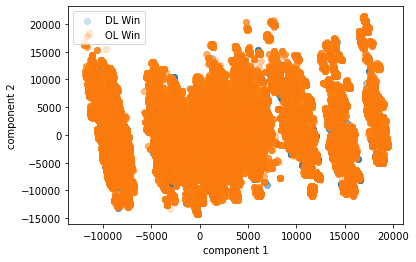

In [10]:
# plot PCA projected data
inx = y==0
class_names = ['DL Win','OL Win']
plt.scatter(X_pca[inx,0],X_pca[inx,1],label='DL Win',alpha=.2)
plt.scatter(X_pca[~inx,0],X_pca[~inx,1],label='OL Win',alpha=.2)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.legend(class_names)# plot PCA projected data

1    1607190
0     200152
Name: olineman_win, dtype: int64


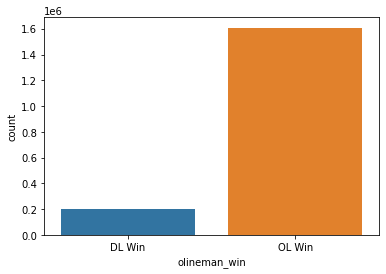

In [11]:
#plot
print(y.value_counts())
class_names = ['DL Win','OL Win']
ax = sns.countplot(x=y); 
ax.set_xticklabels(class_names)
plt.show()

In [12]:
df = X.join(y)

## Under Sampling

In [13]:
# Divide by class
df_class_0    = df[df['olineman_win'] == 0] #class with more samples
df_class_1    = df[df['olineman_win'] == 1] #class with fewer samples
count_class_0 = len(df_class_0)
count_class_1 = len(df_class_1)

Random Under-Sampling:
1    200152
0    200152
Name: olineman_win, dtype: int64


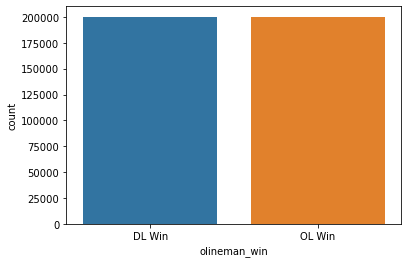

In [14]:
df_class_1_under = df_class_1.sample(count_class_0, replace=True)
df_under         = pd.concat([df_class_1_under, df_class_0], axis=0)
print('Random Under-Sampling:')
print(df_under.olineman_win.value_counts())
#plot
ax = sns.countplot(x=df_under['olineman_win']); 
ax.set_xticklabels(class_names)
plt.show()

In [15]:
df_under

,x_std,y_std,dir_std,o_std,yardLine_std,Opp_Dist,closestOpp_Id,Team_Dist,closestTeam_Id,QB_Dist,closestQB_Id,FootDist,secondsIntoGame,gameId,playId,nflId,down,yardsToGo,preSnapHomeScore,preSnapVisitorScore,pff_nflIdBlockedPlayer,defendersInBox,pff_playAction,pff_positionLinedUp_LG,pff_positionLinedUp_LT,pff_positionLinedUp_RG,pff_positionLinedUp_RT,homeOrAway_home,offenseFormation_EMPTY,offenseFormation_I_FORM,offenseFormation_PISTOL,offenseFormation_SHOTGUN,offenseFormation_SINGLEBACK,offenseFormation_WILDCAT,"personnelO_0 RB, 0 TE, 5 WR","personnelO_0 RB, 1 TE, 4 WR","personnelO_0 RB, 2 TE, 3 WR","personnelO_0 RB, 3 TE, 2 WR","personnelO_1 RB, 0 TE, 4 WR","personnelO_1 RB, 1 TE, 2 WR,1 LB","personnelO_1 RB, 1 TE, 3 WR","personnelO_1 RB, 2 TE, 2 WR","personnelO_1 RB, 3 TE, 1 WR","personnelO_1 RB, 4 TE, 0 WR","personnelO_2 QB, 1 RB, 0 TE, 3 WR","personnelO_2 QB, 1 RB, 1 TE, 2 WR","personnelO_2 QB, 1 RB, 2 TE, 1 WR","personnelO_2 QB, 1 RB, 3 TE, 0 WR","personnelO_2 QB, 2 RB, 0 TE, 2 WR","personnelO_2 QB, 2 RB, 1 TE, 1 WR",...,"personnelO_7 OL, 1 RB, 0 TE, 2 WR","personnelD_0 DL, 3 LB, 8 DB","personnelD_0 DL, 5 LB, 6 DB","personnelD_1 DL, 2 LB, 8 DB","personnelD_1 DL, 3 LB, 7 DB","personnelD_1 DL, 4 LB, 6 DB","personnelD_1 DL, 5 LB, 5 DB","personnelD_2 DL, 2 LB, 7 DB","personnelD_2 DL, 3 LB, 6 DB","personnelD_2 DL, 4 LB, 5 DB","personnelD_2 DL, 5 LB, 4 DB","personnelD_3 DL, 1 LB, 7 DB","personnelD_3 DL, 2 LB, 6 DB","personnelD_3 DL, 3 LB, 5 DB","personnelD_3 DL, 4 LB, 4 DB","personnelD_3 DL, 5 LB, 3 DB","personnelD_4 DL, 1 LB, 6 DB","personnelD_4 DL, 2 LB, 5 DB","personnelD_4 DL, 3 LB, 4 DB","personnelD_4 DL, 4 LB, 3 DB","personnelD_4 DL, 5 LB, 2 DB","personnelD_4 DL, 6 LB, 1 DB","personnelD_5 DL, 1 LB, 5 DB","personnelD_5 DL, 2 LB, 4 DB","personnelD_5 DL, 3 LB, 3 DB","personnelD_5 DL, 5 LB, 1 DB","personnelD_6 DL, 2 LB, 3 DB","personnelD_6 DL, 3 LB, 2 DB","personnelD_6 DL, 4 LB, 1 DB",dropBackType_DESIGNED_ROLLOUT_LEFT,dropBackType_DESIGNED_ROLLOUT_RIGHT,dropBackType_DESIGNED_RUN,dropBackType_SCRAMBLE,dropBackType_SCRAMBLE_ROLLOUT_LEFT,dropBackType_SCRAMBLE_ROLLOUT_RIGHT,dropBackType_TRADITIONAL,pff_passCoverage_2-Man,pff_passCoverage_Bracket,pff_passCoverage_Cover-0,pff_passCoverage_Cover-1,pff_passCoverage_Cover-2,pff_passCoverage_Cover-3,pff_passCoverage_Cover-6,pff_passCoverage_Goal Line,pff_passCoverage_Prevent,pff_passCoverage_Quarters,pff_passCoverage_Red Zone,pff_passCoverageType_Man,pff_passCoverageType_Zone,olineman_win
1359361,74.84,27.790000,2.846632,5.231275,69,2.468441,35562.0,2.122004,53516.0,10.482681,28963.0,18.805130,2451,2021101711,1529,41321.0,1,10,7,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
3003,29.22,27.093333,3.100403,4.854459,25,0.935201,42403.0,2.680019,42404.0,3.923264,25511.0,1.797443,3567,2021090900,3462,42377.0,1,10,28,26,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1
530665,64.57,21.223333,4.517436,1.340587,56,1.397033,47867.0,2.074078,47805.0,6.372794,52461.0,8.055222,2325,2021100308,1586,53466.0,2,3,10,14,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
1508843,32.62,21.860000,2.099980,0.611738,31,0.804301,44880.0,3.170647,52589.0,3.431181,41258.0,2.986788,419,2021091904,444,38642.0,3,4,7,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1071948,98.17,28.573333,3.298498,6.138148,91,0.840536,52435.0,1.601125,41939.0,3.968073,53430.0,3.706535,4381,2021103109,4140,41665.0,3,5,24,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,

In [35]:
X = df_under.drop(['olineman_win', 'x_std', 'y_std', 'nflId'], axis = 1)
y = df_under.olineman_win

Undersample because very large dataset

In [36]:
#train test split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
# param_grid = {
#     "n_estimators": [90, 120],
#     "criterion":("gini", "entropy"), 
#     "max_depth":([12,15])
# }
# #Random forest classifier
# clf = RandomForestClassifier(bootstrap=False,random_state=42)
# tree_cv = GridSearchCV(estimator=clf, param_grid = param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
# tree_cv.fit(X_tr, y_tr)
# best_params = tree_cv.best_params_
# print(f"Best paramters: {best_params})")
# #
# clf = RandomForestClassifier(**best_params,random_state=42)
# clf.fit(X_tr, y_tr)
# y_pred = clf.predict(X_te)
# #
# acc = accuracy_score(y_te, y_pred)
# cm = confusion_matrix(y_te, y_pred)
# fig, ax = plt.subplots(figsize=(5, 3),dpi= 100)
# ax =sns.heatmap(cm/np.sum(cm),annot = True,cmap = "inferno",xticklabels=class_names,yticklabels=class_names)
# plt.yticks(rotation=0) 
# plt.title('accuracy = %3.3f'%acc)
# ax.axis('equal')
# plt.xlabel('true label')
# plt.ylabel('predicted label')
# plt.show()

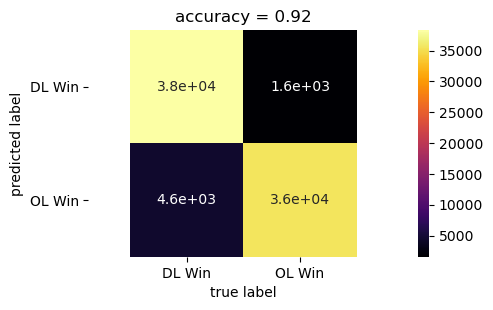

In [38]:
#Random forest classifier
clf = RandomForestClassifier(n_estimators=90,random_state=42,max_depth=20)
clf.fit(X_tr, y_tr)
y_pred = clf.predict(X_te)
acc = accuracy_score(y_te, y_pred)
cm = confusion_matrix(y_te, y_pred)
fig, ax = plt.subplots(figsize=(5, 3),dpi= 100)
ax =sns.heatmap(cm,annot = True,cmap = "inferno",xticklabels=class_names,yticklabels=class_names)
plt.yticks(rotation=0) 
plt.title('accuracy = %2.2f'%acc)
ax.axis('equal')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [39]:
print(classification_report(y_te, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93     39879
           1       0.96      0.89      0.92     40182

    accuracy                           0.92     80061
   macro avg       0.93      0.92      0.92     80061
weighted avg       0.93      0.92      0.92     80061



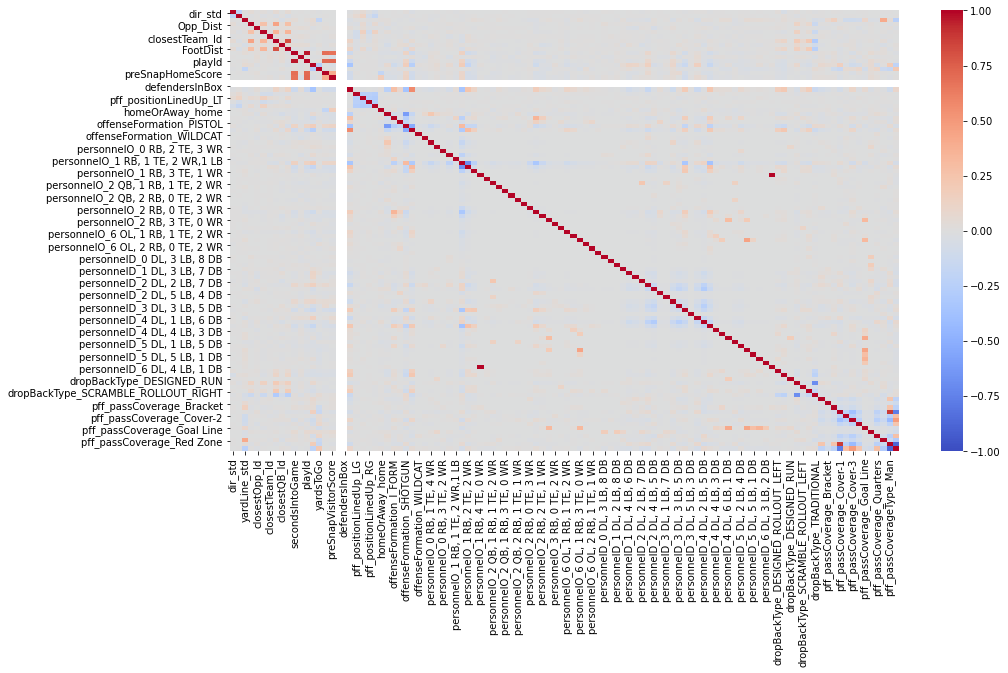

In [42]:
# look at the correlations between X variables
plt.figure(figsize=(15,8.1))
sns.heatmap(X.corr(), annot=False, vmin=-1, vmax=1,cmap ="coolwarm");

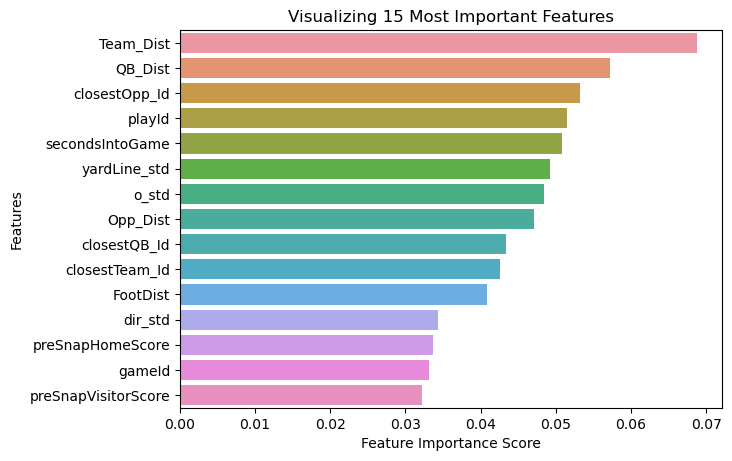

In [43]:
#view feature importance
features = X.columns.tolist()
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False).head(15)
# Creating a bar plot
fig, ax = plt.subplots(figsize=(7, 5),dpi= 100)  #original shape was 8.1, 10
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing 15 Most Important Features")
plt.show()

## Make DF of Predictions and Rank Olinemen

In [24]:
# Make WR win predictions a DF
#pred_WRwin = clf.predict(X)
#pred_WRwin = pd.DataFrame(pred_WRwin, columns = ['pred_WRwin'])